In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 그래프를 그리는 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 표시 자리수의 지정
%precision 3
# 차트를 jupyter Notebook 에 표시하기위한 지정
%matplotlib inline

In [2]:
population = stats.norm(loc = 4, scale = 0.8)

sample_mean_array = np.zeros (10000) # 평균 값을 저장하는 배열
np.random.seed (1) 
for i in range (0, 10000) :
    sample = population.rvs (size = 10) # 표본 추출
    sample_mean_array [i] = np.mean (sample)
sample_mean_array

In [5]:
size_array = np.arange( start = 10, stop = 100100, step = 100)


In [9]:
sample_mean_array_size = np.zeros (len (size_array))


def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)


Text(0, 0.5, 'mean_std value')

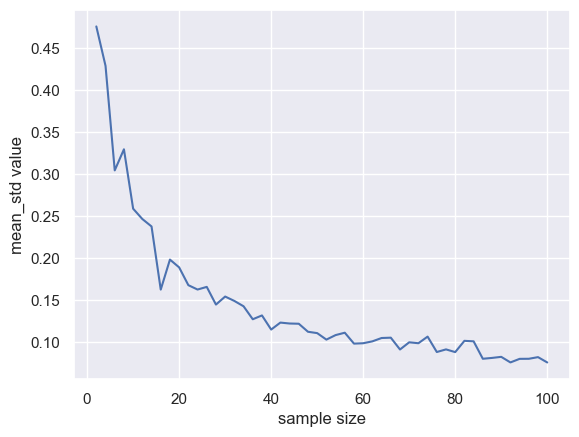

In [10]:
size_array = np.arange( start = 2, stop = 102, step = 2)

sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size =size_array[i], n_trial = 100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof = 1)
plt.plot(size_array, sample_mean_std_array)
plt.xlabel("sample size")
plt.ylabel("mean_std value")


Text(0, 0.5, 'mean_std value')

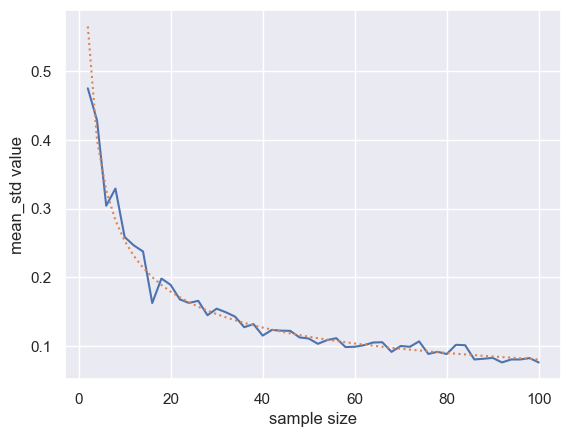

In [11]:
standard_error = 0.8 / np.sqrt(size_array)
plt.plot(size_array,
sample_mean_std_array)
plt.plot(size_array,
standard_error,
linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [12]:
sample_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = np.var(sample, ddof = 0)
np.mean(sample_var_array)


0.575

• 모집단 분산은 0.8 의 제곱 = 0.64

• 그러나 "표본 분산의 평균"은 0.575 → 분산을 과소 평가

In [13]:
unbias_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = np.var(sample, ddof = 1)
np.mean(unbias_var_array)


0.639

Text(0, 0.5, 'unbias var')

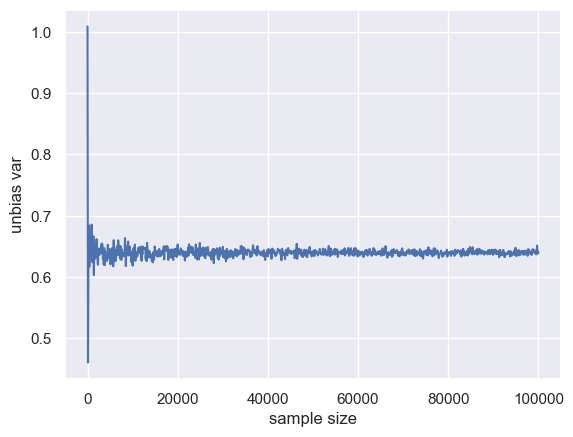

In [14]:
size_array = np.arange(start = 10, stop = 100100, step = 100)
unbias_var_array_size = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof = 1)
plt.plot(size_array, unbias_var_array_size)
plt.xlabel("sample size")
plt.ylabel("unbias var")


C:\Users\timet\AppData\Local\Temp\ipykernel_18652\2963726191.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_coin)


<Axes: ylabel='Density'>

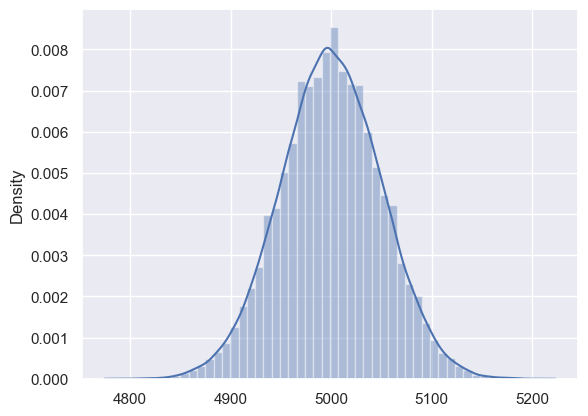

In [16]:
n_size = 10000
n_trial = 50000
# 
앞 = 1, 
뒤 = 0
coin = np.array([0,1])
# 앞면이 나온 회수
count_coin = np.zeros(n_trial)

# 동전을 n_size 번 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin,size = n_size,replace = True))
# histogram 그리기
sns.distplot(count_coin)

3.6 정규 분포와 그 응용

In [30]:
x=3
mu=8
sigma = 0.8

1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(- ((x - mu)**2) / (2 * sigma**2))



0.000

In [27]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3) #OOP

0.228

In [28]:
norm_dist = stats.norm(loc = 4, scale = 0.8) #class
norm_dist.pdf(x = 3)

0.228

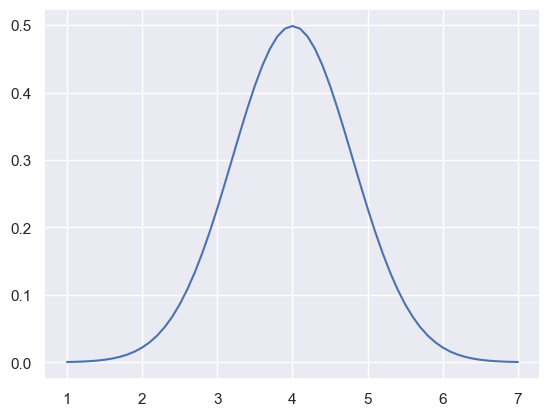

In [32]:
x_plot =  np.arange(start=1,stop=7.1, step=0.1)
plt.plot(x_plot,stats.norm.pdf(x= x_plot, loc=4,scale=0.8))

In [33]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc = 4, scale = 0.8, size = 100000)
np.sum(simulated_sample <= 3) 

10371

### 표본이 어떤 값 이하가 되는 확률

In [34]:
np.sum(simulated_sample <= 3) / len(simulated_sample)

0.104

In [35]:
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [37]:
simulated_sample <= 3

array([False, False, False, ..., False, False, False])

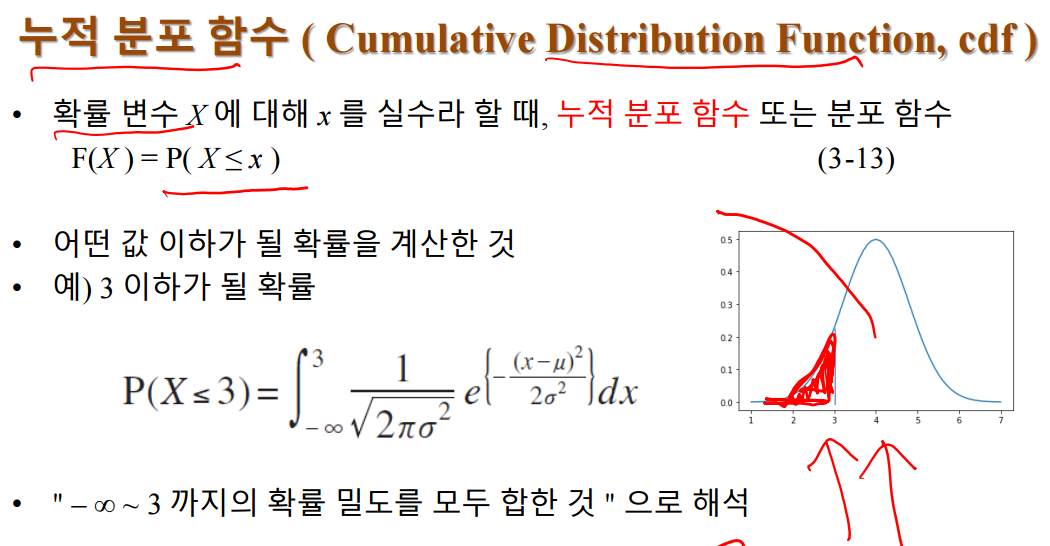

In [38]:
stats.norm.cdf(loc=4,scale=0.8, x=3)

0.106

In [40]:
stats.norm.cdf(loc=4,scale=0.8, x=4)

0.500

In [41]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

In [43]:
lower = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = lower)


3.000

In [42]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)


4.000

### 모집단이 어떤 평균을 가지고 있는가? 

### --> 표본 평균에 대한 표준화

### 분산이 1이 되진 않음,

C:\Users\timet\AppData\Local\Temp\ipykernel_18652\758573603.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_value_array)


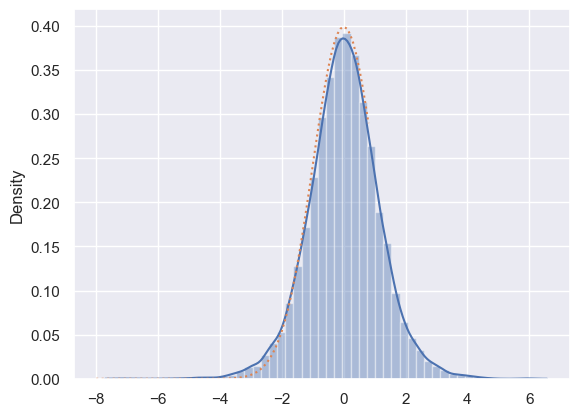

In [49]:
# t 값의 표존 분포, 보지말고 해보자.
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc = 4, scale = 0.8) # 모집단 분포 N( x│4, 0.82)

for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample) # 표본 평균 𝜇 
    sample_std = np.std(sample, ddof = 1) # 𝜎
    sample_se = sample_std / np.sqrt(len(sample)) # 표준 오차
    t_value_array[i] = (sample_mean - 4) / sample_se

sns.distplot(t_value_array)
x= np.arange(start=-8,stop=0.81, step=0.1)
plt.plot(x,stats.norm.pdf(x=x),linestyle='dotted')

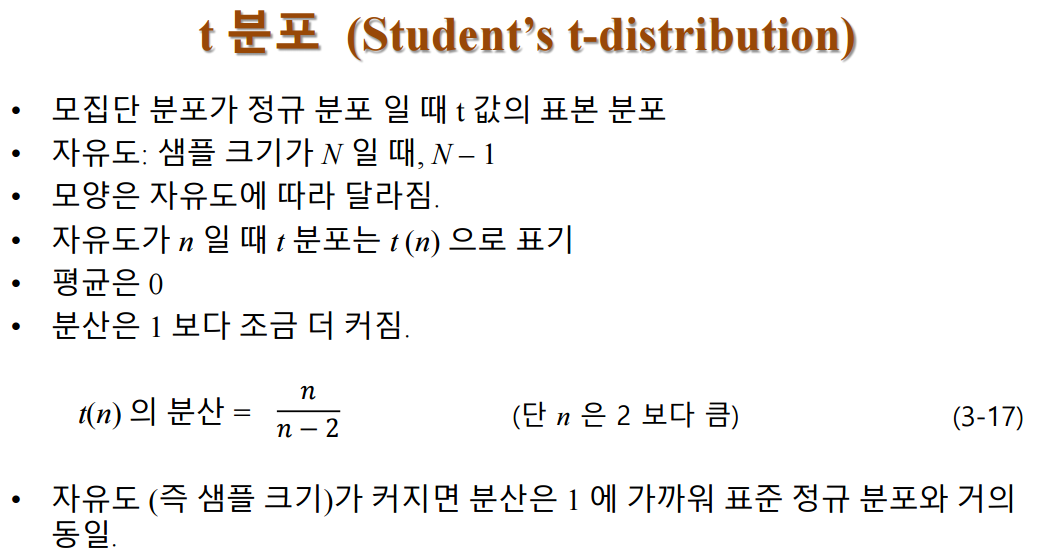

C:\Users\timet\AppData\Local\Temp\ipykernel_18652\3708589614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_value_array)#, norm_hist = True)


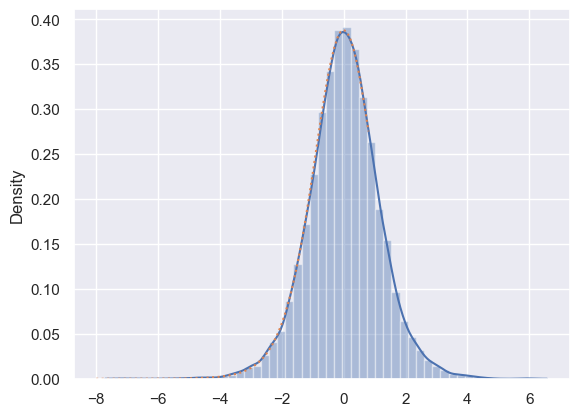

In [54]:
sns.distplot(t_value_array)#, norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), linestyle = 'dotted')


# 3.7 추정

### • 우리의 목표: 모수, 즉 모집단의 매개 변수를 추정

### • 모집단 분포가 정규 분포임을 가정했을 때, 모수를 알면 모집단 분포 추정 가능

### • 점 추정: 모집단 분포의 매개 변수를 어느 한 개의 값으로 지정

### • 구간 추정: 추정 오차를 추가


In [60]:
# 수치 계산
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 그래프
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 표시 자리수의 지정
%precision 3
# 그래프를 jupyter Notebook 에 표시하기위한 지정
%matplotlib inline


In [63]:
fish = pd.read_csv("./3-7-1-fish_length.csv")["length"]


In [66]:
df = len(fish) - 1
sigma = np.std(fish, ddof = 1)
se = sigma / np.sqrt(len(fish))
se
interval = stats.t.interval(confidence = 0.95, df = df, loc = mu, scale = se)
interval


(7.410, 8.590)

In [69]:
t_975 = stats.t.ppf(q = 0.975, df = df)
lower = mu - t_975 * se
upper = mu + t_975 * se

print(t_975 ,lower, upper)

2.2621571627409915 7.409970732331302 8.5900292676687


In [70]:
se2 = (sigma*10) / np.sqrt(len(fish))
stats.t.interval(confidence = 0.95, df = df, loc = mu, scale = se2)

(2.100, 13.900)

In [71]:
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(confidence = 0.95, df = df2, loc = mu, scale = se3)

(7.836, 8.164)

In [72]:
stats.t.interval(confidence = 0.99, df = df, loc = mu, scale = se)

(7.152, 8.848)